In [1]:
# Input parameters
x_origin = 0.0159888
y_origin = 0.0159806
z_origin = 0.003
Lx = 0.0180911
Ly = 0.0180956
Lz = 0.05
pore_size = 0.0005
pore_partition = 12
dx = pore_size/pore_partition
CFL = 0.03
density = 1.204
kinematic_viscosity = 1.513e-05
dynamic_viscosity = kinematic_viscosity * density
velocity = 0.437
percentage = 100 /100
delta = 6

In [2]:
# Calculate Ny and Nz based on dx and lengths
Nx = round(Lx / dx)
Ny = round(Ly / dx)
Nz = round(Lz / dx)

# Ask for periodicity in each direction
is_periodic_x = 1
is_periodic_y = 1
is_periodic_z = 0

# Adjust grid points if periodicity exists
if is_periodic_x:
    Nx = round(percentage*Nx - delta)
    x0 = x_origin + (0.5 * Lx) - (Nx / 2) * dx
   # x0 = x_origin + (Lx / 2)  # Center the mesh in the x-direction for 1D
else:
    Nx = Nx + delta
    x0 = x_origin - ((delta/2) * dx)

if is_periodic_y:
    Ny = round(percentage*Ny - delta)
    y0 = y_origin + (0.5 * Ly) - (Ny / 2) * dx
    #y0 = y_origin +(0.5 * Ly)  # Center the mesh in the y-direction for 1D
else:
    Ny = Ny + delta
    y0 = y_origin - ((delta/2) * dx)

if is_periodic_z:
    Nz = round(percentage*Nz - delta)
    z0 = z_origin + (0.5 * Lz) - (Nz / 2) * dx
    #z0 = z_origin + (Lz / 2)  # Center the mesh in the z-direction for 1D
else:
    Nz = Nz + delta
    z0 = z_origin - ((delta/2) * dx)

# Calculate time step dt
dt = CFL * dx / velocity

# Calculate Tau
Tau = 0.5 + ((3 * dynamic_viscosity * density * dt) / dx**2)

P = (density*(dx/dt)**2)/3

#Re = Density *  Velocity * Pore_Diameter / kinematic_viscosity
Re = velocity*pore_size/kinematic_viscosity

# Display the results
print('--- Results ---')
print('Case: SchwaryD70P')
print(f'Pore size:{pore_size}, Pore partition {pore_partition}')

print(f'Input file Data: {dx:.2e} {x0:.6f} {y0:.6f} {z0:.6f}')
print(f'                 {dx:.2e} {dt:.3e} {Nx} {Ny} {Nz}\n\n')
print(f'CFL: {CFL}')
print(f'dx: {dx:.3e}')
print(f'Time step (dt): {dt:.3e}')
print(f'Number of grid points (Nx, Ny, Nz): {Nx} {Ny} {Nz}')
print(f'New origin points (x0, y0, z0): {x0:.6f} {y0:.6f} {z0:.6f}')
print(f'Velocity {velocity}')
print(f'Pressure: {P:.4f}')
print(f'Tau: {Tau}')

--- Results ---
Case: SchwaryD70P
Pore size:0.0005, Pore partition 12
Input file Data: 4.17e-05 0.016118 0.016112 0.002875
                 4.17e-05 2.860e-06 428 428 1206


CFL: 0.03
dx: 4.167e-05
Time step (dt): 2.860e-06
Number of grid points (Nx, Ny, Nz): 428 428 1206
New origin points (x0, y0, z0): 0.016118 0.016112 0.002875
Velocity 0.437
Pressure: 85.1580
Tau: 0.6084087198462242


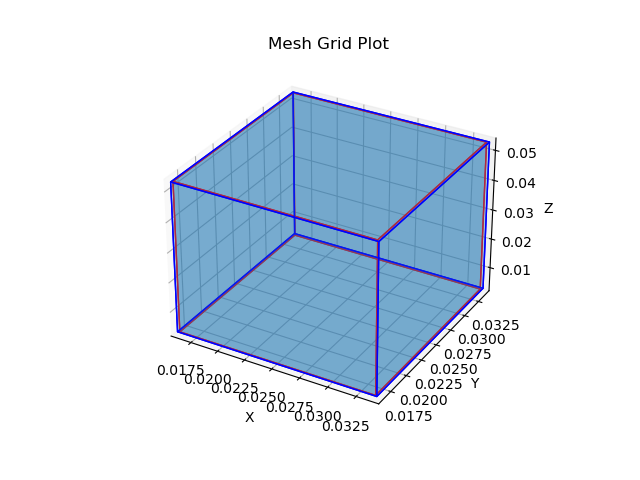

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math
    
# Calculate maximum coordinates for both boxes
xmax1 = x_origin + Lx
ymax1 = y_origin + Ly
zmax1 = z_origin + Lz

# Define vertices and edges for both boxes
vertices1 = [
    [x_origin, y_origin, z_origin],
    [xmax1, y_origin, z_origin],
    [xmax1, ymax1, z_origin],
    [x_origin, ymax1, z_origin],
    [x_origin, y_origin, zmax1],
    [xmax1, y_origin, zmax1],
    [xmax1, ymax1, zmax1],
    [x_origin, ymax1, zmax1]
]

# Define edges for both boxes
edges1 = [
    [vertices1[0], vertices1[1], vertices1[2], vertices1[3]],
    [vertices1[4], vertices1[5], vertices1[6], vertices1[7]],
    [vertices1[0], vertices1[1], vertices1[5], vertices1[4]],
    [vertices1[2], vertices1[3], vertices1[7], vertices1[6]],
    [vertices1[0], vertices1[3], vertices1[7], vertices1[4]],
    [vertices1[1], vertices1[2], vertices1[6], vertices1[5]]
]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the edges of both boxes
ax.add_collection3d(Poly3DCollection(edges1, edgecolor='b',label='Stl', lw=1, alpha=0.2))

# Plot grid nodes
x_nodes = np.linspace(x0, x0 + (Nx - 1) * dx, Nx)
y_nodes = np.linspace(y0, y0 + (Ny - 1) * dx, Ny)
z_nodes = np.linspace(z0, z0 + (Nz - 1) * dx, Nz)
X, Y, Z = np.meshgrid(x_nodes, y_nodes, z_nodes)

# Define the vertices of the box
vertices = [
    [X[0, 0, 0], Y[0, 0, 0], Z[0, 0, 0]],
    [X[0, -1, 0], Y[0, -1, 0], Z[0, -1, 0]],
    [X[-1, -1, 0], Y[-1, -1, 0], Z[-1, -1, 0]],
    [X[-1, 0, 0], Y[-1, 0, 0], Z[-1, 0, 0]],
    [X[0, 0, -1], Y[0, 0, -1], Z[0, 0, -1]],
    [X[0, -1, -1], Y[0, -1, -1], Z[0, -1, -1]],
    [X[-1, -1, -1], Y[-1, -1, -1], Z[-1, -1, -1]],
    [X[-1, 0, -1], Y[-1, 0, -1], Z[-1, 0, -1]]
]

# Define the edges of the box
edges2 = [
    [vertices[0], vertices[1], vertices[2], vertices[3]],
    [vertices[4], vertices[5], vertices[6], vertices[7]],
    [vertices[0], vertices[1], vertices[5], vertices[4]],
    [vertices[2], vertices[3], vertices[7], vertices[6]],
    [vertices[0], vertices[3], vertices[7], vertices[4]],
    [vertices[1], vertices[2], vertices[6], vertices[5]]
]

# Create a Poly3DCollection for the edges of the box
edges = Poly3DCollection(edges2, edgecolor='r',label='Mesh', lw=1, alpha=0.2)

# Add the collection to the 3D plot
ax.add_collection3d(edges)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Mesh Grid Plot')

# Set axis limits based on box dimensions
ax.set_xlim([min(x0,x_origin),max(Lx,xmax1)])
ax.set_ylim([min(y0,y_origin),max(Ly,ymax1)])
ax.set_zlim([min(z0,z_origin),max(Lz,zmax1)])

# Show the plot
plt.show()